In [1]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [2]:
train_data.shape,test_data.shape

((25000,), (25000,))

In [3]:
train_labels.shape, test_labels.shape 

((25000,), (25000,))

In [9]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [12]:
number=59
import numpy as np
np.sum([ 1 for array in train_data if number in array])

5175

In [2]:
import numpy as np
max(np.max(train_data))


9995

In [16]:
words=["hola mi nombre es johan y casi nunca puede dejar de hacer nada, see ese soy yo yo",
       "la devsdtaion es una buena obra de arte",
       "pero quienes somos nosotros para presumir"
      ]
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer=TfidfVectorizer(analyzer='word')
data=vectorizer.fit_transform(words)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vector=CountVectorizer()
data01=vector.fit(words)

In [20]:
vector.vocabulary_

{'hola': 9,
 'mi': 12,
 'nombre': 14,
 'es': 6,
 'johan': 10,
 'casi': 2,
 'nunca': 16,
 'puede': 21,
 'dejar': 4,
 'de': 3,
 'hacer': 8,
 'nada': 13,
 'see': 23,
 'ese': 7,
 'soy': 25,
 'yo': 27,
 'la': 11,
 'devsdtaion': 5,
 'una': 26,
 'buena': 1,
 'obra': 17,
 'arte': 0,
 'pero': 19,
 'quienes': 22,
 'somos': 24,
 'nosotros': 15,
 'para': 18,
 'presumir': 20}

In [8]:
data01=vector.transform(words)

In [9]:
data01.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 2],
       [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0]], dtype=int64)

In [10]:
data.toarray()

array([[0.        , 0.        , 0.23468231, 0.17848195, 0.23468231,
        0.        , 0.17848195, 0.23468231, 0.23468231, 0.23468231,
        0.23468231, 0.        , 0.23468231, 0.23468231, 0.23468231,
        0.        , 0.23468231, 0.        , 0.        , 0.        ,
        0.        , 0.23468231, 0.        , 0.23468231, 0.        ,
        0.23468231, 0.        , 0.46936462],
       [0.37380112, 0.37380112, 0.        , 0.28428538, 0.        ,
        0.37380112, 0.28428538, 0.        , 0.        , 0.        ,
        0.        , 0.37380112, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37380112, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37380112, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40824829, 0.    

In [11]:
np.unique(data01.toarray())

array([0, 1, 2], dtype=int64)

In [17]:
np.unique(train_labels)

array([0, 1], dtype=int64)

### Ahora recurrimos al metodo tradicional de codificacion

In [40]:
def vectorize_sequences(sequences,dimension=10000):
    vector=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        vector[i,sequence]=1
    return vector    

In [45]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [46]:
x_train.shape,x_test.shape

((25000, 10000), (25000, 10000))

In [48]:
y_train=np.array(train_labels).astype('float32')
y_test=np.array(test_labels).astype('float32')

#### Datos listos para procesarlos a una red neuronal

In [49]:
#invocamos a la red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
#invocamos la libreria de sklearn
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [70]:
def generate_model():
    #configuracion del modelo , para este caso usamos 16 neuronas en las dos primeras capas
    model=Sequential()
    model.add(Dense(16,activation='relu',input_shape=(10000,)))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy']
             )
    return model

In [71]:
model=generate_model()

In [72]:
#ahora nos enfocamos en la configuracion de entrenamiento
history=model.fit(x_train,y_train,epochs=20,batch_size=256,validation_data=(x_val,y_val))


Epoch 1/20
79/79 [==============================] - 2s 22ms/step - loss: 0.4066 - accuracy: 0.8379 - val_loss: 0.2973 - val_accuracy: 0.8874
Epoch 2/20
79/79 [==============================] - 1s 15ms/step - loss: 0.2241 - accuracy: 0.9168 - val_loss: 0.2768 - val_accuracy: 0.8902
Epoch 3/20
79/79 [==============================] - 1s 15ms/step - loss: 0.1721 - accuracy: 0.9379 - val_loss: 0.2886 - val_accuracy: 0.8880
Epoch 4/20
79/79 [==============================] - 1s 15ms/step - loss: 0.1363 - accuracy: 0.9525 - val_loss: 0.4047 - val_accuracy: 0.8612
Epoch 5/20
79/79 [==============================] - 1s 15ms/step - loss: 0.1123 - accuracy: 0.9618 - val_loss: 0.3563 - val_accuracy: 0.8788
Epoch 6/20
79/79 [==============================] - 1s 15ms/step - loss: 0.0928 - accuracy: 0.9683 - val_loss: 0.3883 - val_accuracy: 0.8728
Epoch 7/20
79/79 [==============================] - 1s 15ms/step - loss: 0.0758 - accuracy: 0.9743 - val_loss: 0.4306 - val_accuracy: 0.8694
Epoch 8/20
79

In [73]:
plot_model(model,to_file='comentarios POSTIVOS or NEGATIVOS.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [74]:
#ahora graficamos el desenvolvimiento de nuestros modelos, tanto como en los puntajes de perdida y precision
%matplotlib inline
import matplotlib.pyplot as plt


In [75]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [76]:
#para los puntajes de perdida
train_loss=history.history['loss']
validation_loss=history.history['val_loss']
#para los puntajes de precision del modelo
train_acc=history.history['accuracy']
validation_acc=history.history['val_accuracy']
#para evaluarlos en funcion de las epocas realizadas
epochs=range(1,len(history.history['accuracy'])+1)

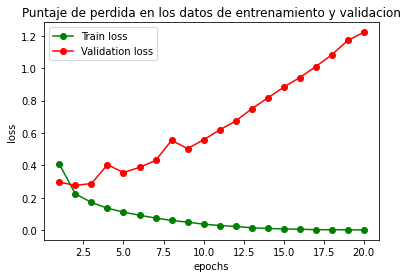

In [80]:
#grafica de evaluacion para los puntajes de perdida
def plot_perdida(epochs,train_loss,validation_loss):
    plt.plot(epochs,train_loss,'go-',label='Train loss')
    plt.plot(epochs,validation_loss,'ro-',label='Validation loss')
    plt.title('Puntaje de perdida en los datos de entrenamiento y validacion')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()
    
plot_perdida(epochs,train_loss,validation_loss)

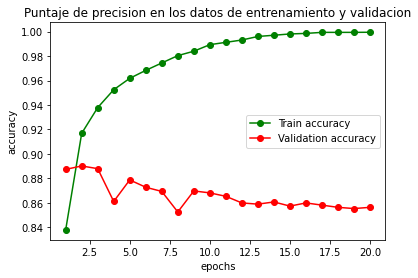

In [81]:
#grafica de evaluacion para los puntajes de perdida
def plot_precision(epochs,train_acc,validation_acc):
    plt.plot(epochs,train_acc,'go-',label='Train accuracy')
    plt.plot(epochs,validation_acc,'ro-',label='Validation accuracy')
    plt.title('Puntaje de precision en los datos de entrenamiento y validacion')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.show()
plot_precision(epochs,train_acc,validation_acc)

In [66]:
model.save('comentary_classification_overfitting.h5')

In [79]:
#ahora generamos un nuevo modelo con una configuracion de entrenamiento de 3 epochs
model=generate_model()
history=model.fit(x_train,y_train,epochs=3,batch_size=256,validation_data=(x_val,y_val))

Epoch 1/3
79/79 [==============================] - 2s 19ms/step - loss: 0.4124 - accuracy: 0.8320 - val_loss: 0.3449 - val_accuracy: 0.8536
Epoch 2/3
79/79 [==============================] - 1s 15ms/step - loss: 0.2262 - accuracy: 0.9179 - val_loss: 0.2805 - val_accuracy: 0.8900
Epoch 3/3
79/79 [==============================] - 1s 15ms/step - loss: 0.1706 - accuracy: 0.9401 - val_loss: 0.3163 - val_accuracy: 0.8810


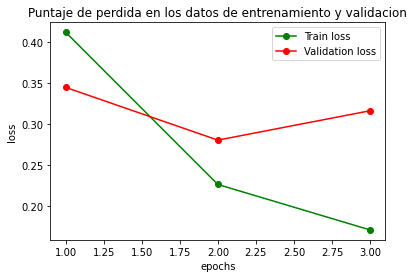

In [83]:
#observamos las mejoras luego del reentrenamiento
epochs=range(1,len(history.history['accuracy'])+1)
plot_perdida(epochs,history.history['loss'],history.history['val_loss'])

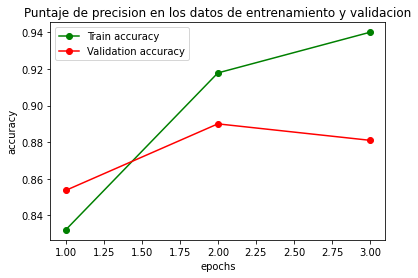

In [85]:
plot_precision(epochs,history.history['accuracy'],history.history['val_accuracy'])

In [86]:
#ahora validamos el modelo con datos nunca antes vistos
loss,acc=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3308 - accuracy: 0.8711


In [87]:
x_test.shape

(25000, 10000)

In [88]:
y_predict=model.predict(x_test)


In [105]:
y_predict=np.where(y_predict>=0.5,1,0)